In [83]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [84]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [85]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [86]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [87]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [88]:
#normalize the data
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [89]:
#create a model CNN
model  = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides =2,padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides =2,padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides =2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))




In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [91]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics= ['accuracy'])

In [93]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 117ms/step - loss: 0.4256 - accuracy: 0.8164 - val_loss: 0.4606 - val_accuracy: 0.7972
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3953 - accuracy: 0.8347 - val_loss: 0.5511 - val_accuracy: 0.7400
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3743 - accuracy: 0.8454 - val_loss: 0.4987 - val_accuracy: 0.7884
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3635 - accuracy: 0.8550 - val_loss: 0.5184 - val_accuracy: 0.7684
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3346 - accuracy: 0.8666 - val_loss: 0.4629 - val_accuracy: 0.8250
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2977 - accuracy: 0.8867 - val_loss: 0.5297 - val_accuracy: 0.7800
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2940 - accuracy: 0.8888 - val_loss: 0.4925 - val_ac

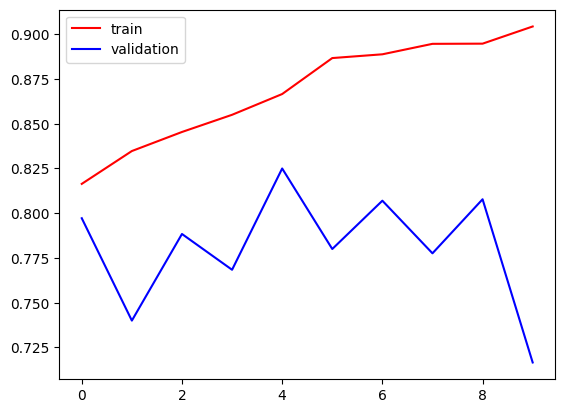

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

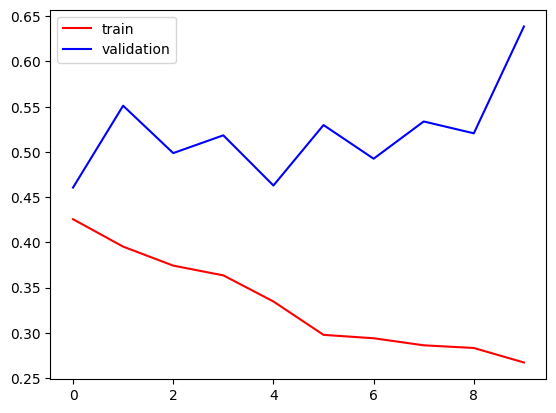

In [95]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [120]:
import cv2

In [127]:
test_img = cv2.imread('/content/train/dogs/dog.0.jpg')

In [128]:
from PIL import Image
test_img = Image.open('/content/train/dogs/dog.0.jpg')


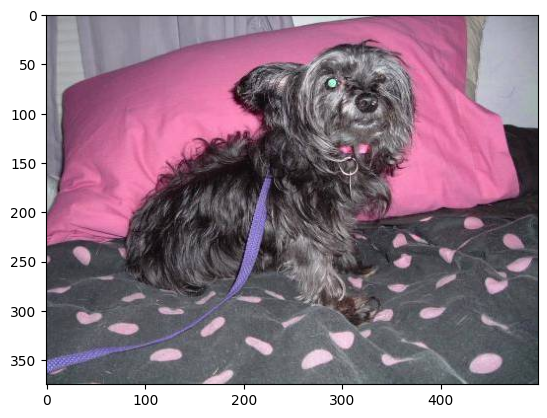

In [129]:
plt.imshow(test_img)

# New Section

In [130]:
test_img.size

(499, 375)

In [131]:
test_img = cv2.imread('/content/train/dogs/dog.10240.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [132]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.13668056]], dtype=float32)